# Apparel Industry Analysis

## Group Member: Andi Wang 29916046, Jack Yu 92200294, Reshum Zubair 91807925

## I. Quantitative Analysis of the Apperal Industry

We chose the apperal/fashion industry with codes starting with'56'.

In [ ]:
# load relavant packages
import pandas as pd
df1 = pd.read_csv('2020_10K_item1_full.csv', index_col=0)
df2 = pd.read_csv('major_groups.csv', index_col=0)
df3 = pd.read_csv('public_firms.csv', index_col=0)
df3.head()

In [ ]:
# Here we filtered the firms belonging to the industry sector we selected
industry = df3[df3['sic'].astype(str).str[:2] == '56']
print(industry)

In [ ]:
# a.How many unique firm-year ("fyear") observations are there in the filtered dataset?
unique_years = industry['fyear'].nunique()
print(f"Number of unique years: {unique_years}")
#the number of unique years in the dataset are 27 

# b.How many unique firms are there in the filtered dataset?
unique_firms = industry['conm'].nunique()
print(f"Number of unique firms: {unique_firms}")
#there are 105 unique firms in the filtered dataset 

# c.How many firms in the filtered dataset have records over all 27 years (1994-2020)?
year_filtered = industry[(industry['fyear'] >= 1994) & (industry['fyear'] <= 2020)]
years_with_records = year_filtered.groupby('gvkey')['fyear'].nunique()
all_years = years_with_records[years_with_records == (2020 - 1994 + 1)]
num_companies = len(all_years)
print(f"Number of firms with records over all 27 years (1994-2020): {num_companies}")
#11 firms in the filetered dataset have records for all 27 years from 1994-2020


In [152]:
# B.[Preliminary Analysis] 
#1.highest stock price
stock_price=industry[industry['fyear']==2020].sort_values('prcc_c',ascending=False)
print("the top 10 firms with highest stock price in 2020 are:\n" + str(stock_price.head(10)))
#we identified top 10 firms with highest stock price in 2020, in the filetered dataset 

the top 10 firms with highest stock price in 2020 are:
        fyear location                    conm     ipodate   sic  prcc_c  \
gvkey                                                                      
18675    2020      USA   BURLINGTON STORES INC  2013/10/02  5600  261.55   
9248     2020      USA         ROSS STORES INC         NaN  5651  122.81   
11672    2020      USA       TJX COS INC (THE)         NaN  5651   68.29   
65430    2020      USA     CHILDRENS PLACE INC  1997/09/19  5600   50.10   
163051   2020      USA         CITI TRENDS INC  2005/05/18  5651   49.68   
21898    2020      USA  BOOT BARN HOLDINGS INC  2014/10/30  5661   43.36   
11584    2020      USA         FOOT LOCKER INC         NaN  5661   40.44   
27938    2020      USA       SHOE CARNIVAL INC  1993/03/16  5661   39.18   
6733     2020      USA   BATH & BODY WORKS INC         NaN  5600   37.19   
162988   2020      USA              ZUMIEZ INC  2005/05/06  5651   36.78   

               ch       ni      

In [153]:
#2.highest sale in history
sales=industry.sort_values('sale',ascending=False)
print("top 10 firms with the highest sales in the entire history of dataset: \n")
print(sales.groupby(['conm']).mean(['sale']).sort_values(['sale'],ascending= False).head(10))
#identified the top 10 firms with the highest sales in the entire history of dataset

top 10 firms with the highest sales in the entire history of dataset: 

                               fyear     sic      prcc_c           ch  \
conm                                                                    
TJX COS INC (THE)             2007.0  5651.0   41.403241  1554.143889   
GAP INC                       2007.0  5651.0   27.036556  1517.501037   
BATH & BODY WORKS INC         2007.0  5600.0   33.600926  1395.512370   
NORDSTROM INC                 2007.0  5651.0   40.842204   581.392556   
ROSS STORES INC               2007.0  5651.0   49.373981   620.601111   
VICTORIAS SECRET AND CO       2019.5  5621.0         NaN   290.000000   
FOOT LOCKER INC               2007.0  5661.0   27.490926   549.703704   
BURLINGTON STORES INC         2015.5  5600.0  122.773750   236.875500   
INTIMATE BRANDS INC  -CL A    1997.0  5600.0   24.031167   133.980714   
BURLINGTON COAT FACTORY INVS  2004.0  5651.0   18.875636    63.562526   

                                       ni        as

In [154]:
# 3.geographical distribution
top_10_locations = industry['location'].value_counts().sort_values(ascending=False).head(10)
print("top 10 locations with the most firms: \n" + str(top_10_locations))
#identified geographical distributions  of all firms 

top 10 locations with the most firms: 
location
USA    1363
CAN       4
Name: count, dtype: int64


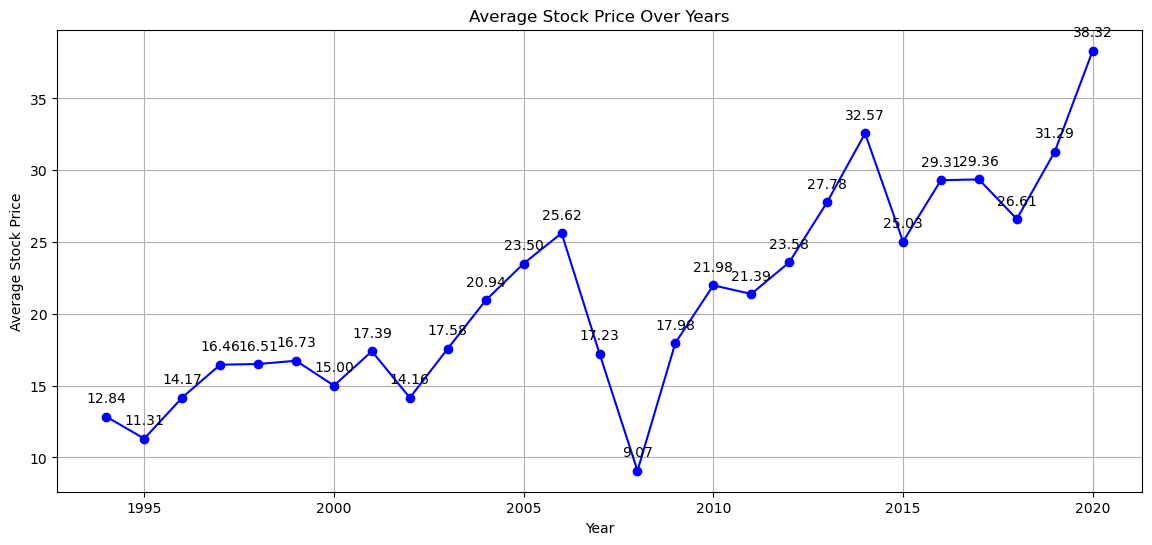

In [19]:
# 4.average stock price line chart
import matplotlib.pyplot as plt
average_prices_per_year = industry.groupby('fyear')['prcc_c'].mean()
plt.figure(figsize=(14, 6)) 
plt.plot(average_prices_per_year.index, average_prices_per_year.values, marker='o', linestyle='-', color='b') 

'''
# Adding annotations for each year 
# Here GPT is used to know how to add annotations for each year
Name, version, company of AI tool:Chat GPT-4 by OpenAI
Chat objective:to generate the coding to adding annotations for each year
Use of AI-generated content: I used the statements from # Add annotations for each point# but adjusted the values inside to match my line chart
URL of chat history:https://chatgpt.com/c/66fcc42b-09bc-8012-829d-6c0b9fc73825
Time and date of chat:2024.10.01 20:55
'''
for i, (year, price) in enumerate(average_prices_per_year.items()):
    plt.annotate(f'{price:.2f}', (year, price), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Average Stock Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Stock Price')
plt.grid(True)

plt.show()

### Interpretation
Overall,the stock price showed an upward trend,except for year 2008, where the stock price dipped to USD9.07 due to the financial crisis.
The stock price  recovered quickly and the peaked in year 2020(final year) in dataset at USD38.32 

In [106]:
# 5.Which firm was affected the most by the 2008 Financial Crisis, as measured by the percentage drop in stock price from 2007 to 2008?
# Filter for 2007 and 2008 data
df_2007 = df3[df3['fyear'] == 2007].set_index('conm')
df_2008 = df3[df3['fyear'] == 2008].set_index('conm')
print("INCA DESIGNS INC took the hardest hit in the financial crisis heading to its bankrupcy in the same year\u00B9")
merged_df = df_2007[['prcc_c']].rename(columns={'prcc_c': 'price_2007'}).merge(
    df_2008[['prcc_c']].rename(columns={'prcc_c': 'price_2008'}),
    left_index=True, right_index=True)
merged_df['perc_drop'] = ((merged_df['price_2007'] - merged_df['price_2008']) / merged_df['price_2007']) * 100
max_drop_firm = merged_df['perc_drop'].idxmax()
max_drop_value = merged_df.loc[max_drop_firm, 'perc_drop']
print(f"Firm with the most significant drop: {max_drop_firm}")
print(f"Percentage drop in stock price: {max_drop_value:.2f}%")

INCA DESIGNS INC took the hardest hit in the financial crisis heading to its bankrupcy in the same year¹
Firm with the most significant drop: INCA DESIGNS INC
Percentage drop in stock price: 99.98%


C:\Users\14193\AppData\Local\Temp\ipykernel_13900\684535493.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry['roa']=industry['ni']/industry['asset']


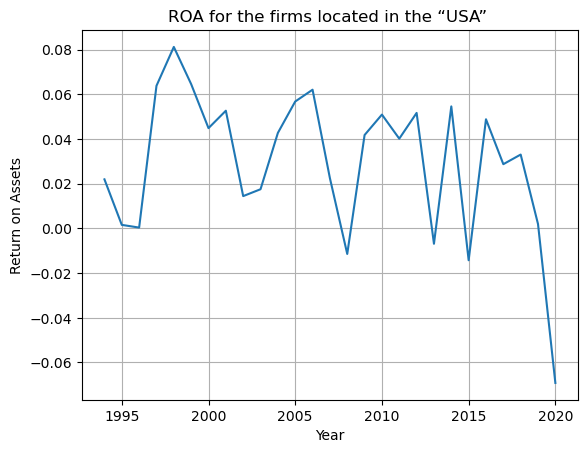

sic       5631.894520
prcc_c      21.282605
ch         224.697608
ni          98.304737
asset     1427.686568
sale      2546.244743
roa          0.029527
dtype: float64

In [26]:
# 6.Plot the average Return on Assets (ROA) for the firms located in the “USA” across the years. ROA is calculated as ni/asset.
#Plot the average Return on Assets (ROA) for the firms located in the “USA” across the years.

import matplotlib.pyplot as plt
industry['roa']=industry['ni']/industry['asset']
roa=industry[industry['location']=='USA'].groupby(['fyear']).mean(['roa'])
years=roa.index
plt.title('ROA for the firms located in the “USA” ')
plt.xlabel('Year')
plt.ylabel('Return on Assets')
plt.grid(True)
plt.plot(years,roa['roa'])
plt.yscale('linear') 
plt.show()
roa.mean()


### Interpretation
The ROA for the apparel industry fluctuated around its mean of 3%
The ROA was significantly weighed down in 2020 by few underperforming firms e.g GAP  (probably because of Covid!)

## II. Text Analysis on the Apperal Industry

In [ ]:
#C.Text Cleaning: 
#coverted words to lower case 
#removed punctuations 
#removed stop words using NLTK
import os
import json
import pandas as pd
import string
df1['item']=df1['item_1_text'].str.lower()
df1['item']=df1['item'].str.replace(f"[{string.punctuation}]", "", regex=True)

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

df1['item'] = df1['item'].apply(remove_stopwords)

In [ ]:
# D1 new DataFrame‘merge_new’
merge_new = pd.merge(industry, df1, on='gvkey', how='inner')
merge_new.head(10)

In [ ]:
# Top 10 keywords for each firm based on two different methods: word counts and TF-IDF score.
# Method 1 - word counts

from collections import Counter
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def get_top_keywords(text):
    words = text.split()  
    filtered_words = [word for word in words if word not in stop_words]
    c = Counter(filtered_words)
    top_words = [pair[0] for pair in c.most_common(10)]
    return ' '.join(top_words)
merge_new['top_keywords'] = merge_new['item'].apply(get_top_keywords)
print(merge_new.head())


In [ ]:
# Method 2 - TF-IDF score

!pip3 install scikit-learn

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
document_list = merge_new['item'].tolist()
stop_words = stopwords.words('english') 
def get_keywords_tfidf(document_list):
    vectorizer = TfidfVectorizer(stop_words=stop_words) 
    tfidf_matrix = vectorizer.fit_transform(document_list)  
    feature_names = vectorizer.get_feature_names_out() 
    top_keywords = []  
    for i in range(len(document_list)):
        feature_index = tfidf_matrix[i, :].nonzero()[1]  
        feature_value = [tfidf_matrix[i, x] for x in feature_index] 
        tfidf_scores = zip(feature_index, feature_value) 
        sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)  
        top_keywords.append(' '.join([feature_names[i] for i, _ in sorted_tfidf_scores[:10]])) 
        if i % 200 == 199: 
            print(f'Processed {i + 1}/{len(document_list)} documents.')
    return top_keywords
tfidf_keywords = get_keywords_tfidf(document_list)
merge_new['top_keyword_tfidf'] = tfidf_keywords
print(type(tfidf_keywords))
print(len(tfidf_keywords))
print(merge_new[['conm', 'top_keywords', 'top_keyword_tfidf']].head(10))
merge_new.to_csv(r"2020_10K_item1_tfidf.csv", index=None, encoding='utf-8')

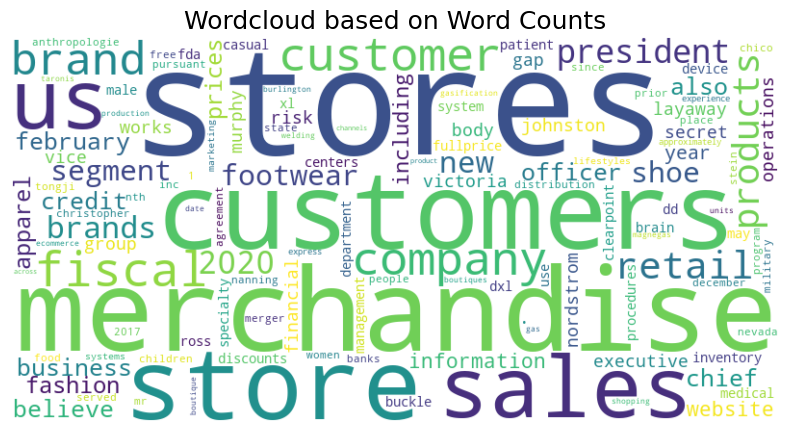

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# D3（1）wordclouds based on the word counts 

word_counts = Counter(" ".join(merge_new['top_keywords']).split())
wordcloud_word_counts = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_word_counts, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud based on Word Counts", fontsize=18)
plt.show()

### Interpretation
Some most frequently mentioned keywords are 'Stores', 'sales', 'customers' and 'merchandise' which indicates a highly consumer-centric focus of the apparel industry (makes sense!)

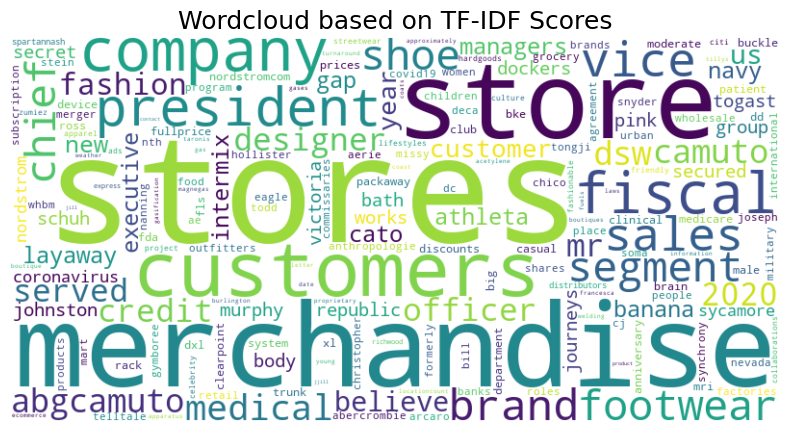

In [44]:
# D3（2）. wordclouds based on TF-IDF 
tfidf_word_counts = Counter(" ".join(merge_new['top_keyword_tfidf']).split())
wordcloud_tfidf = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_tfidf, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud based on TF-IDF Scores", fontsize=18)
plt.show()

### Interpretation
The most relevant keywords in the apparel industry, relative to others are :  'Stores','customers','footware' and 'brand' which indicates compared to other industries, apperal industry has clearer segmentation based on brands and customers.

In [46]:
#Method 3 - Word 2 Vec 
from gensim.models import Word2Vec

### We choose words "merchandise","brand" and "customers" and identified the five most relevant keywords for each term

In [48]:
docs = [row.split() for row in df1['item']]

In [ ]:
#model training
model = Word2Vec(docs, min_count=5, vector_size=50, workers=3, window=5, sg = 1)

In [ ]:
#model saved for later use
model.save("word2vec0928.model")

In [50]:
#model retrieval
model = Word2Vec.load("word2vec0928.model")

In [62]:
#Indentify top 5 words similar to 'merchandise
model.wv.most_similar('merchandise',topn=5)

[('inseason', 0.8853835463523865),
 ('retailer', 0.8538973927497864),
 ('stores', 0.8449999690055847),
 ('assortment', 0.8375034332275391),
 ('instore', 0.8371490836143494)]

In [64]:
model.wv.most_similar('brand',topn=5)

[('brands', 0.9185768365859985),
 ('bergio', 0.8484963774681091),
 ('guess', 0.8392025828361511),
 ('lee®', 0.834293782711029),
 ('ugg', 0.8283988833427429)]

In [66]:
model.wv.most_similar('customer',topn=5)

[('endcustomer', 0.8958505392074585),
 ('client', 0.8832085132598877),
 ('customers', 0.8557703495025635),
 ('enduser', 0.8119181394577026),
 ('postsale', 0.8059603571891785)]

### Interpretation
Merchandise and customer are both somewhat interchangeable with the similar words we found based on our model. Interestingly, for the word 'brand', the similar words are the names of the brand.

## III. Financial Analysis and Operational Suggestions for famous retailer Nordstrom

In [ ]:
#find the data of nordstrom
merge_new[merge_new['gvkey']==7922]

In [74]:
#Analysis of the historical stock prices, ROA, revenue, and assets of the chosen firm
nord=merge_new[merge_new['gvkey']==7922]
nord_sto=nord['prcc_c']
nord_roa=nord['roa']
nord_rev=nord['ni']
nord_ass=nord['asset']

In [ ]:
years=nord['fyear']
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# First plot
axs[0, 0].plot(years,nord_sto)
axs[0, 0].set_title('Stock Prices')

# Second plot
axs[0, 1].plot(years,nord_ass)
axs[0, 1].set_title('Asset')

# Third plot
axs[1, 0].plot(years,nord_rev)
axs[1, 0].set_title('Revenue')

# Fourth plot
axs[1, 1].plot(years,nord_roa)
axs[1, 1].set_title('ROA')

# Adjust the layout
plt.tight_layout()

for i, ax in enumerate(axs.flat):
    ax.grid(True)  # Enable grid for each subplot

# Show the plot
plt.show()

In [84]:
nord_cor =nord.iloc[:,[6,8,9,11]]
nord_cor.corr()

,prcc_c,ni,asset,roa
prcc_c,1.000000,0.526269,0.441614,0.374031
ni,0.526269,1.000000,0.323219,0.850669
asset,0.441614,0.323219,1.000000,-0.131128
roa,0.374031,0.850669,-0.131128,1.000000


### Interpretation & Suggestion
The most related variables are net income and roa which is expected given the formula of roa<br>
From the graphs, we can see a high potential correlation of revenue with ROA and stock prices. This is why, the ROA and stock prices took a nose dive in 2020 when the revenue was negetively impacted by Covid 19<br>
Therefore, Northstorm should have been  highly revenue focused (i/o cost focused) in the aftermath of the pandemic <sup>2</sup>

### Reference1. Zackery, K. (2008, Aug 22). WAY OVER ITS HEAD: INCA STRUGGLES TO STAY AFLOAT. *The New York Post*. https://nypost.com/2008/08/22/way-over-its-head-inca-struggles-to-stay-afloat/<br>
2. Daphne, H. (2020, Aug 3).What the pandemic has done to Nordstrom’s revamp. *RETAIL DIVE*. https://www.retaildive.com/news/what-the-pandemic-has-done-to-nordstroms-revamp/582635/

